# **Prediction Using Decision Tree Algorithm**
**Siddharth Trivedi**

https://github.com/SidT12/TSF-TASKS/tree/main/Task%236

In [1]:
import sklearn.datasets as datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

y=iris.target

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [11]:
df.isna().any() #checking for null values

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

In [12]:
df.duplicated() #checking for duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

# Data Visualization

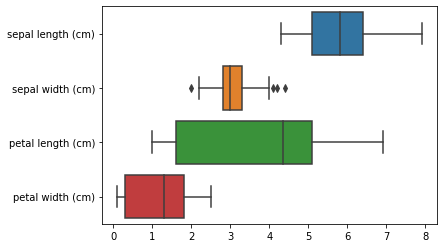

In [13]:
sns.boxplot(data=df, orient="h")

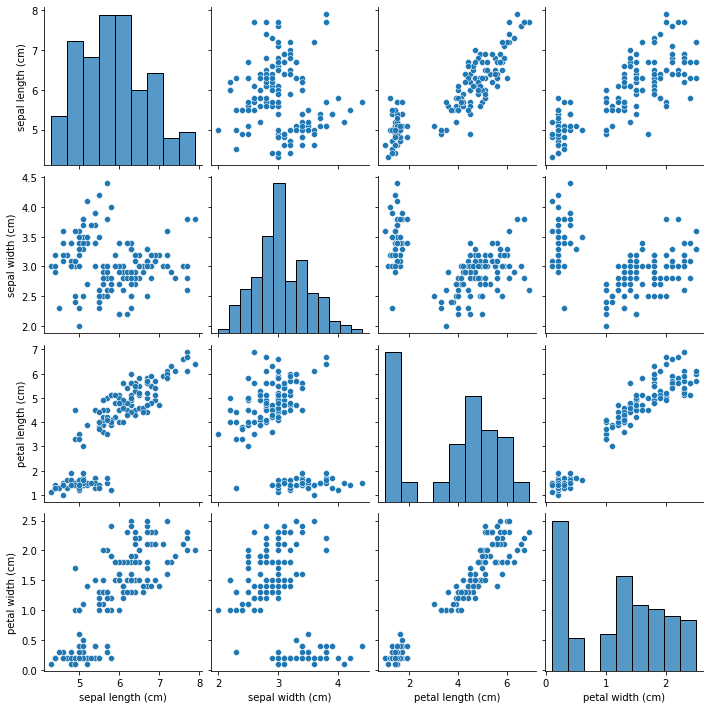

In [14]:
sns.pairplot(df)

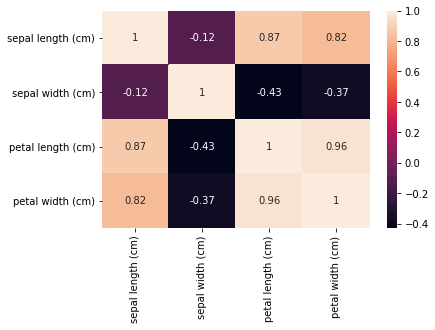

In [17]:
sns.heatmap(df.corr(), annot = True)

# Implementing Decision Tree Algorithm

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.25, random_state = 0)

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [34]:
predictions = dtree.predict(X_test)

# Performance measuring metrics

In [35]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test,predictions))
print("Classification Report : \n",metrics.classification_report(y_test,predictions))
print("Confusion Matrix: \n",metrics.confusion_matrix(y_test,predictions))

Accuracy: 0.9736842105263158
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

Confusion Matrix: 
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


# Decision Tree Visualization

In [36]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


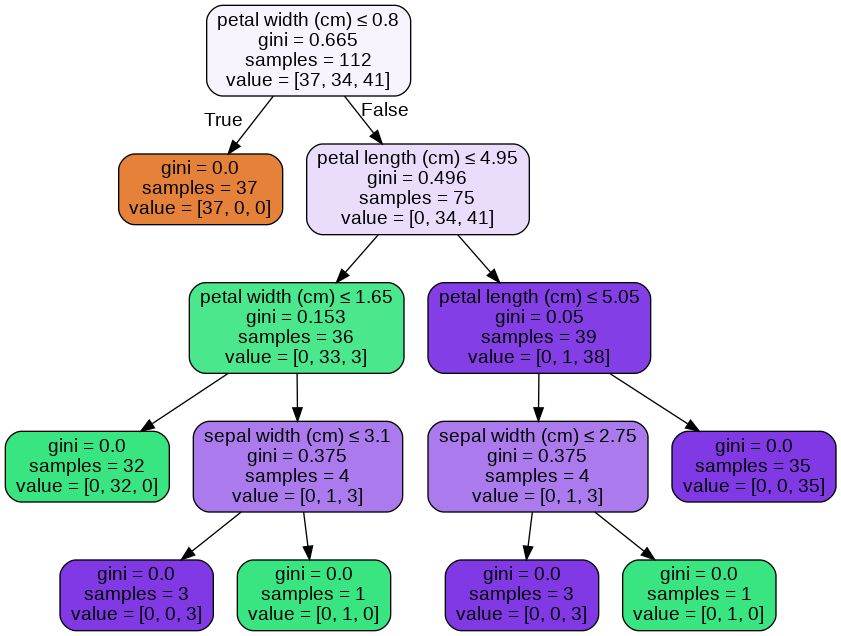

In [37]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())